In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
sns.set_theme()

from Materials import Material, Concrete, Steel
from Sections import Rectangular, Section, HollowRectangular, HollowCircular

In [46]:
frp = Material('FRP', 600e6, 80e9, 'black')
confining_steel = Steel('Confining Steel', 190e9, 500e6, 'blue')
reinf_steel = Steel('Reinforcing Steel', 190e9, 500e6, 'blue')
concrete = Concrete('Concrete', 37e9, 50e6, 'gray', None)

test_section = HollowRectangular(concrete, 0.600, 0.600,0.36,0.36,0.13)

# test_section = Rectangular(concrete, 0.600, 0.600)
test_section.add_reinforcements(reinf_steel, 0.030, [(0.065,0.065) , (0.535,0.065) , (0.065,0.535) , (0.535,0.535) , (0.1825,0.065) , (0.065,0.1825) , (0.535,0.1825) , (0.1825,0.535) , (0.3,0.065) , (0.065,0.3) , (0.3,0.535) , (0.535,0.3) , (0.4175,0.065) , (0.065,0.4175) , (0.4175,0.535) , (0.535,0.4175)
                            ])
# test_section = Rectangular(concrete, 0.35, 0.35)
# test_section.add_reinforcements(reinf_steel,0.025, [(0.05,0.05) , (0.3,0.05) , (0.05,0.3) , (0.3,0.3) , (0.133333333333333,0.05)  , (0.133333333333333,0.3) , (0.216666666666667,0.05)  , (0.216666666666667,0.3)
#   ])

# test_outer_steel = HollowRectangular(confining_steel, 0.5, 0.5, 0.46, 0.46, 0.02, 0, 0)
# test_concrete = Rectangular(concrete, 0.46, 0.46, 0.02, 0.02)
# test_section = test_outer_steel + test_concrete


# test_section = Rectangular(concrete, 0.6,0 .6)
# test_section.add_reinforcements(reinf_steel,0.025, [(0.0425,0.0425) , (0.5575,0.0425) , (0.0425,0.5575) , (0.5575,0.5575) , (0.214166666666667,0.0425) , (0.0425,0.214166666666667) , (0.5575,0.214166666666667) , (0.214166666666667,0.5825) , (0.385833333333333,0.0425) , (0.0425,0.385833333333333) , (0.385833333333333,0.5575) , (0.5575,0.385833333333333)
#                                                     ])


# test_concrete_section = HollowCircular(steel,0.60,0.02,0.3,0.3)
# test_concrete_section.add_reinforcements(concrete, 0.032, [(0.065,0.065) , (0.535,0.065) , (0.065,0.535) , (0.535,0.535) , (0.221666666666667,0.065) , (0.065,0.221666666666667) , (0.535,0.221666666666667) , (0.221666666666667,0.535) , (0.378333333333333,0.065) , (0.065,0.378333333333333) , (0.378333333333333,0.535) , (0.535,0.378333333333333)
#            ])


In [47]:
test_section.generate_slices()
test_section.calculate_neutral_axis(7132200
, concrete, confining_steel)
print("Neutral axis:", test_section.neutral_axis)
test_section.slices.to_csv("output.csv")
test_section.slices



Neutral axis: 0.551339939384543


,height,mid_height,Concrete_area,Steel_area,strain,steel_stress,concrete_stress,steel_force,concrete_force,total_force,total_moment,steel_moment
0,0.0005,0.00025,0.0003,0.0,0.003498,0.0,2.833333e+07,0.0,8500.0,8500.0,2547.875,0.0
1,0.0010,0.00075,0.0003,0.0,0.003495,0.0,2.833333e+07,0.0,8500.0,8500.0,2543.625,0.0
2,0.0015,0.00125,0.0003,0.0,0.003492,0.0,2.833333e+07,0.0,8500.0,8500.0,2539.375,0.0
3,0.0020,0.00175,0.0003,0.0,0.003489,0.0,2.833333e+07,0.0,8500.0,8500.0,2535.125,0.0
4,0.0025,0.00225,0.0003,0.0,0.003486,0.0,2.833333e+07,0.0,8500.0,8500.0,2530.875,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.5980,0.59775,0.0003,0.0,-0.000295,0.0,0.000000e+00,0.0,0.0,0.0,-0.000,-0.0
1196,0.5985,0.59825,0.0003,0.0,-0.000298,0.0,0.000000e+00,0.0,0.0,0.0,-0.000,-0.0
1197,0.5990,0.59875,0.0003,0.0,-0.000301,0.0,0.000000e+00,0.0,0.0,0.0,-0.000,-0.0
1198,0.5995,0.59925,0.0003,0.0,-0.000304,0.0,0.000000e+00,0.0,0.0,0.0,-0.000,-0.0


In [48]:
print(f"Sum Moment: {test_section.slices.total_moment.sum():.2f} Nm")
print(f"Sum Concrete Area: {test_section.slices.Concrete_area.sum():.6f} m^2")
print(f"Sum Steel Area: {test_section.slices.Steel_area.sum():.6f} m^2")
print(f"Sum Force: {test_section.slices.total_force.sum():.2f} Nm")
print(f"Steel Force: {test_section.slices.steel_force.sum():.2f} Nm")
print(f"Concrete Force: {test_section.slices.concrete_force.sum():.2f} Nm")
print(f"Maximum Axial Force: {confining_steel.strength /1.15 * test_section.slices.Steel_area.sum() + concrete.design_strength * test_section.slices.Concrete_area.sum():.2f} N")


Sum Moment: 869192.03 Nm
Sum Concrete Area: 0.219108 m^2
Sum Steel Area: 0.011292 m^2
Sum Force: 7132200.17 Nm
Steel Force: 2872379.72 Nm
Concrete Force: 4259820.45 Nm
Maximum Axial Force: 11117452.30 N


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


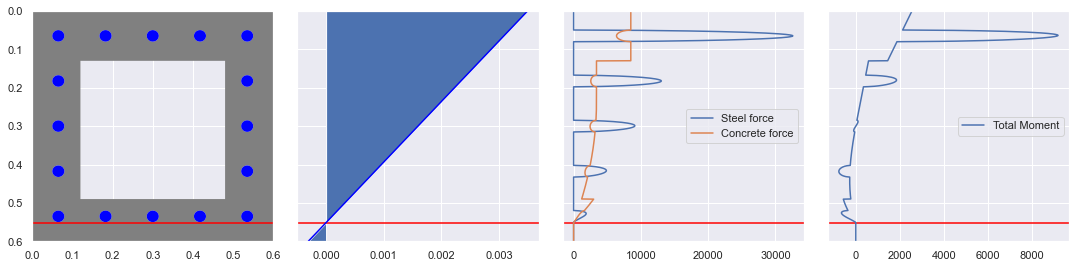

In [49]:

# left  = 0.125  # the left side of the subplots of the figure
# right = 0.125    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

fig, axs = plt.subplots(1, 4, sharey=True, squeeze=True, figsize=(16, 4))
                       
axs[0].invert_yaxis()
axs[0].set_ylim(0,0.6)
axs[0].set_xlim(0,0.6)
axs[0].invert_yaxis()

slices = test_section.slices
test_section.plot(axs[0])

for ax in axs:
    ax.axhline(test_section.neutral_axis, color='red')

axs[1].plot(
    slices.strain,
    slices.mid_height,
    color='blue'
    
)

axs[1].fill_betweenx(
    slices.mid_height,0,slices.strain,
    
)

axs[2].plot(
    slices.steel_force,
    slices.mid_height,
    label = "Steel force"
)
axs[2].plot(
    slices.concrete_force,
    slices.mid_height,
    label = "Concrete force"
)
axs[2].legend()

    
# axs[2].plot(
#     slices.steel_stress,
#     slices.mid_height,
#     label = "Steel stress"
# )
# axs[2].plot(
#     slices.concrete_stress,
#     slices.mid_height,
#     label = "Concrete stress"
# )
# axs[2].legend()

axs[3].plot(
    slices.total_moment,
    slices.mid_height,
    label = "Total Moment"
# )
# axs[3].plot(
#     slices.concrete_moment,
#     slices.mid_height,
#     label = "Concrete Moment"
)
axs[3].legend()

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.3)
# [ax.set_aspect('equal') for ax in axs.ravel()]

plt.savefig("New1-600-Level00.svg", format="svg")

In [6]:
test_section.generate_slices()
axial_loads = np.arange(0, 10366755, 100e3)
out = []
for axial_load in axial_loads:
    test_section.calculate_neutral_axis(axial_load, concrete, reinf_steel)
    total_moment = test_section.slices.total_moment.sum()
    print(axial_load, total_moment)
    out.append({'axial_load': axial_load, 'total_moment': total_moment})
interaction_table = pd.DataFrame(out)
interaction_table

0.0 947632.2521083939
100000.0 969934.286999098
200000.0 991731.5519124093
300000.0 1012974.005120625
400000.0 1032733.2697107585
500000.0 1050231.1693265685
600000.0 1066110.5155982263
700000.0 1080934.8975213699
800000.0 1095366.852664135
900000.0 1109522.0884842419
1000000.0 1123378.082927378
1100000.0 1136913.8282026488
1200000.0 1150127.991445906
1300000.0 1163072.932086788
1400000.0 1175760.8339334636
1500000.0 1188161.839149365
1600000.0 1200242.3510251092
1700000.0 1211966.534198874
1800000.0 1223312.3379635871
1900000.0 1234244.8754428795
2000000.0 1243415.6279669162
2100000.0 1247991.0196912987
2200000.0 1250407.961226195
2300000.0 1252574.0523115708
2400000.0 1254634.7077338477
2500000.0 1256574.3411894774
2600000.0 1258375.8856588327
2700000.0 1260020.768789032
2800000.0 1261488.866102926
2900000.0 1262758.766860918
3000000.0 1263807.7953636686
3100000.0 1264610.4249970345
3200000.0 1265137.4215579932
3300000.0 1264798.112702023
3400000.0 1258665.3227260322
3500000.0 124828

,axial_load,total_moment
0,0.0,9.476323e+05
1,100000.0,9.699343e+05
2,200000.0,9.917316e+05
3,300000.0,1.012974e+06
4,400000.0,1.032733e+06
...,...,...
99,9900000.0,1.155838e+05
100,10000000.0,9.308484e+04
101,10100000.0,6.901701e+04
102,10200000.0,4.306096e+04


In [6]:
#interaction_table['axial_load_kn'] = interaction_table.axial_load / 1e3
interaction_table_kn = interaction_table / 1e3
g = sns.lineplot(
    data = interaction_table_kn,
    y = 'axial_load',
    x = 'total_moment',
    sort=False
)
g.set_xlabel("Moment [kNm]")
g.set_ylabel("Axial Load [kN]")
g.set_ylim([0, None])
g.set_xlim([0, None])

NameError: name 'interaction_table' is not defined

In [50]:
x = list(test_section.polygons[concrete].exterior.coords)
print(x)
list(zip(x, x[1:] + [x[0]]))

[(0.0, 0.6), (0.6, 0.6), (0.6, 0.0), (0.0, 0.0), (0.0, 0.6)]


[((0.0, 0.6), (0.6, 0.6)),
 ((0.6, 0.6), (0.6, 0.0)),
 ((0.6, 0.0), (0.0, 0.0)),
 ((0.0, 0.0), (0.0, 0.6)),
 ((0.0, 0.6), (0.0, 0.6))]

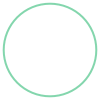

In [51]:
test_section.polygons[concrete].interiors[10]


In [52]:
test_section.second_moments_of_area

{Concrete: {'x': 0.009399685868405996,
  'y': 0.009399685868405996,
  'xy': 4.160277669700128e-19},
 Reinforcing Steel: {'x': 6.341315940011202e-07,
  'y': 6.341315940011202e-07,
  'xy': 3.1754257410850766e-22}}